# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Learning rate schedules



# Tips for learning rate schedules
<hr style="border:2px solid black"> </hr>


- Increase the initial learning rate. Because the learning rate will decrease, start with a larger value to
    decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the
    beginning, allowing you to benefit from fine tuning later. 

- Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make
    updates in the right direction when your learning rate shrinks to small values. 

- Experiment with different schedules. It will not be clear which learning rate schedule to use so try a few 
    with different configuration options and see what works best on your problem. Also try schedules that change
    exponentially and even schedules that respond to the accuracy of your model on the training or test datasets.   



# Import modules
<hr style="border:2px solid black"> </hr>

In [7]:
import pandas
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

# Dataset
<hr style="border:2px solid black"> </hr>


- The Ionosphere binary classification problem is used as a demonstration in this lesson. 
- The dataset describes radar returns where the target was free electrons in the ionosphere. 
- It is a binary classification problem 
where positive cases (g for good) show evidence of some type of structure in the ionosphere and negative 
cases (b for bad) do not. 
- It is a good dataset for practicing with neural networks because all of the inputs are small numerical values of the same scale. There are 34 attributes and 351 observations 



In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("../DATASETS/ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# Time-Based Learning Rate Schedule
<hr style="border:2px solid black"> </hr>

  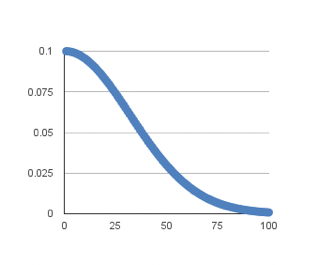

In [6]:
# Create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer = "normal" , activation= "relu" ))                                         
model.add(Dense(1, kernel_initializer = "normal" , activation = "sigmoid" ))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= "binary_crossentropy" , optimizer="sgd", metrics=[ "accuracy" ])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/50
9/9 - 0s - loss: 0.6932 - accuracy: 0.4809 - val_loss: 0.6933 - val_accuracy: 0.6810
Epoch 2/50
9/9 - 0s - loss: 0.6922 - accuracy: 0.6638 - val_loss: 0.6913 - val_accuracy: 0.6983
Epoch 3/50
9/9 - 0s - loss: 0.6913 - accuracy: 0.6809 - val_loss: 0.6890 - val_accuracy: 0.7069
Epoch 4/50
9/9 - 0s - loss: 0.6904 - accuracy: 0.6809 - val_loss: 0.6878 - val_accuracy: 0.7069
Epoch 5/50
9/9 - 0s - loss: 0.6895 - accuracy: 0.6979 - val_loss: 0.6849 - val_accuracy: 0.7241
Epoch 6/50
9/9 - 0s - loss: 0.6885 - accuracy: 0.6766 - val_loss: 0.6832 - val_accuracy: 0.7328
Epoch 7/50
9/9 - 0s - loss: 0.6876 - accuracy: 0.6851 - val_loss: 0.6807 - val_accuracy: 0.7328
Epoch 8/50
9/9 - 0s - loss: 0.6867 - accuracy: 0.6468 - val_loss: 0.6782 - val_accuracy: 0.7241
Epoch 9/50
9/9 - 0s - loss: 0.6857 - accuracy: 0.6170 - val_loss: 0.6776 - val_accuracy: 0.7241
Epoch 10/50
9/9 - 0s - loss: 0.6849 - accuracy: 0.6766 - val_loss: 0.6752 - val_accuracy: 0.7241
Epoch 11/50
9/9 - 0s - loss: 0.6839 - a

# Drop-Based Learning Rate Schedule
<hr style="border:2px solid black"> </hr>


- Another popular learning rate schedule used with deep learning models is to systematically drop the learning 
rate at specific times during training. 



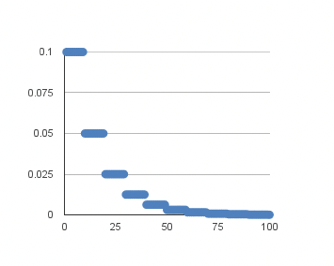

In [ ]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("../DATASETS/ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer = "normal" , activation= "relu" ))                                         
model.add(Dense(1, kernel_initializer = "normal" , activation = "sigmoid" ))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss= "binary_crossentropy" , optimizer="sgd", metrics=[ "accuracy" ])

# Learning schedule callback


- We can implement this in Keras using the LearningRateScheduler callback4 when fitting the model. 
- The LearningRateScheduler callback allows us to define a function to call that takes the epoch number as an argument and returns the learning rate to use in stochastic gradient descent.



In [9]:
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50,
          batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50
9/9 - 0s - loss: 0.6960 - accuracy: 0.4809 - val_loss: 0.6877 - val_accuracy: 0.7759
Epoch 2/50
9/9 - 0s - loss: 0.6879 - accuracy: 0.6681 - val_loss: 0.6737 - val_accuracy: 0.8879
Epoch 3/50
9/9 - 0s - loss: 0.6805 - accuracy: 0.6979 - val_loss: 0.6712 - val_accuracy: 0.6810
Epoch 4/50
9/9 - 0s - loss: 0.6717 - accuracy: 0.7362 - val_loss: 0.6556 - val_accuracy: 0.7241
Epoch 5/50
9/9 - 0s - loss: 0.6604 - accuracy: 0.7532 - val_loss: 0.6272 - val_accuracy: 0.8534
Epoch 6/50
9/9 - 0s - loss: 0.6457 - accuracy: 0.7404 - val_loss: 0.6180 - val_accuracy: 0.6983
Epoch 7/50
9/9 - 0s - loss: 0.6274 - accuracy: 0.7532 - val_loss: 0.5774 - val_accuracy: 0.7931
Epoch 8/50
9/9 - 0s - loss: 0.6076 - accuracy: 0.7617 - val_loss: 0.5329 - val_accuracy: 0.8793
Epoch 9/50
9/9 - 0s - loss: 0.5871 - accuracy: 0.7660 - val_loss: 0.5155 - val_accuracy: 0.8707
Epoch 10/50
9/9 - 0s - loss: 0.5674 - accuracy: 0.7830 - val_loss: 0.5179 - val_accuracy: 0.8534
Epoch 11/50
9/9 - 0s - loss: 0.5559 - a

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

